In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# Dataset Overview

#### Importing Dataset

In [2]:
df = pd.read_csv('case_study_marketing_20210201.csv')

#### Dataset Preview

In [3]:
df

,ymd,market_code,account_id,pub_campaign_id,pub_adgroup_id,pub_keyword_id,keyword_name,pub_device,match_type,theme_name_english,replacement_type_name,impressions,clickins,cost,clickout,bookings,clickout_rev,booking_amount,users_engagement
0,20200905,DE,321,11312819993,114584083847,4729772737,neos marmaras hotels,phone,0,Hotel,City,1,0,0,0,0.0,0,0.0,490
1,20200905,DE,515,180791594,3133140280,76004101942085,altstadt florenz,desktop,0,HotelsHistoricCity,City,1,0,0,0,0.0,0,0.0,455
2,20200905,UK,505,180388254,1211662269993764,75729226461556,+apartment +wigan,desktop,2,Apartment,City,4,0,0,0,0.0,0,0.0,207
3,20200905,AU,391,11144550479,112858143241,93007224,accommodation jervis bay,tablet,1,Accommodation,City,1,0,0,0,0.0,0,0.0,253
4,20200905,BR,318,619614653,10709471032,4576251921,hoteis em Dubai,phone,0,Hotel,City,13,1,6,0,0.0,0,0.0,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275180,20210303,CA,719,180699551,1212761344370965,75797601552370,addis abeba,desktop,0,RegionOnly,RegionOnly,0,0,0,0,0.0,0,0.0,47
1275181,20210303,UK,368,11722685491,114073451499,18763314731,+formentera,phone,2,RegionOnly,RegionOnly,0,0,0,0,0.0,0,0.0,30
1275182,20210303,CA,719,180699530,2549199849,116341251666,Hawaii,tablet,0,RegionOnly,RegionOnly,0,0,0,0,0.0,0,0.0,87
1275183,20210303,DE,321,11312821157,111263541255,41368747,kreta,desktop,0,RegionOnly,RegionOnly,0,0,0,0,NaN,0,NaN,336


#### Number of Bookings per Ad

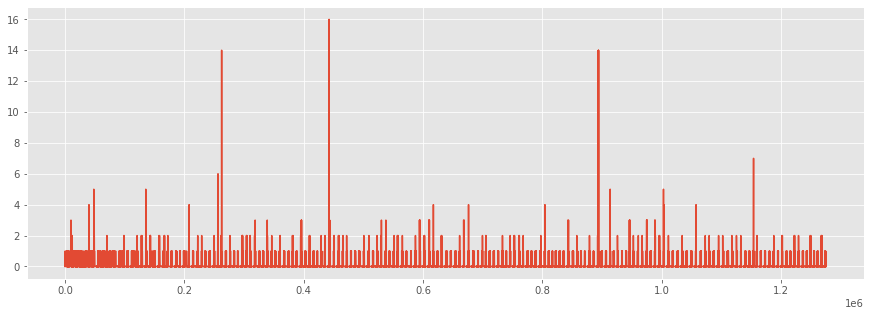

In [4]:
df['bookings'].plot()

#### Number of Ads that had at least one booking

In [5]:
at_least_one_booking = df[df['bookings'] > 0]
len(at_least_one_booking)

2138

#### Number of Ads that had at least two bookings

In [6]:
at_least_two_bookings = df[df['bookings'] > 1]
len(at_least_two_bookings)

177

#### Number of Ads that had at least one booking sorted by Country

In [7]:
at_least_one_booking_counts = at_least_one_booking['market_code'].value_counts()
at_least_one_booking_counts

AU    904
BR    747
CA    180
UK    166
DE    141
Name: market_code, dtype: int64

#### Number of Ads that had at least one booking sorted by Country as percentage of total >1 bookings

In [8]:
at_least_one_by_country = at_least_one_booking_counts / at_least_one_booking_counts.sum()
at_least_one_by_country

AU    0.422825
BR    0.349392
CA    0.084191
UK    0.077643
DE    0.065949
Name: market_code, dtype: float64

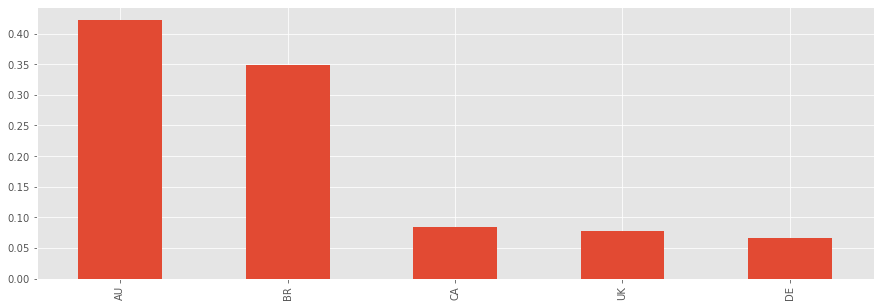

In [9]:
at_least_one_by_country.plot(kind='bar')

#### Number of ads that had at least one booking sorted by type of device

In [10]:
at_least_one_booking['pub_device'].value_counts()

desktop    1150
phone       916
tablet       72
Name: pub_device, dtype: int64

#### Number of ads that had at least one booking sorted by number of matching keywords

In [11]:
at_least_one_booking['match_type'].value_counts()

2    1198
0     719
1     221
Name: match_type, dtype: int64

#### Average time Users engage with Trivago website

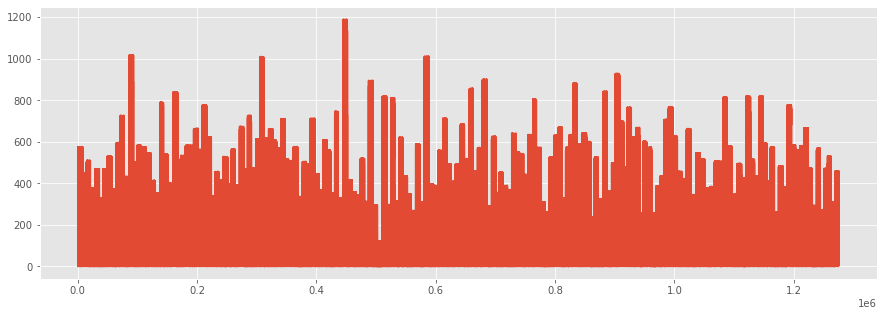

In [12]:
df['users_engagement'].plot()

#### Trivago Revenue per Ad

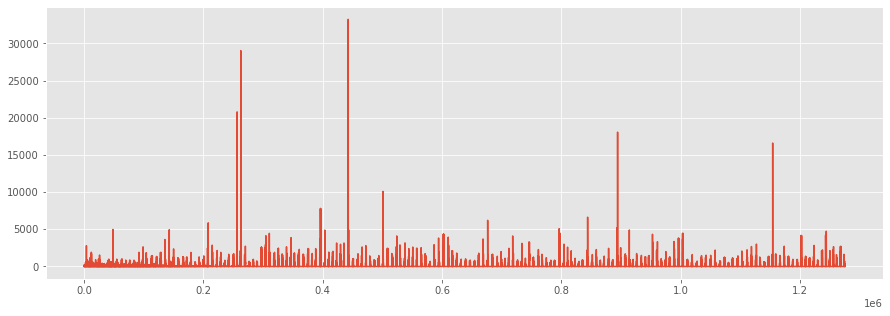

In [13]:
df['clickout_rev'].plot()

In [14]:
countries = df['market_code'].value_counts()
countries

DE    532865
UK    283979
BR    263488
AU    118402
CA     76451
Name: market_code, dtype: int64

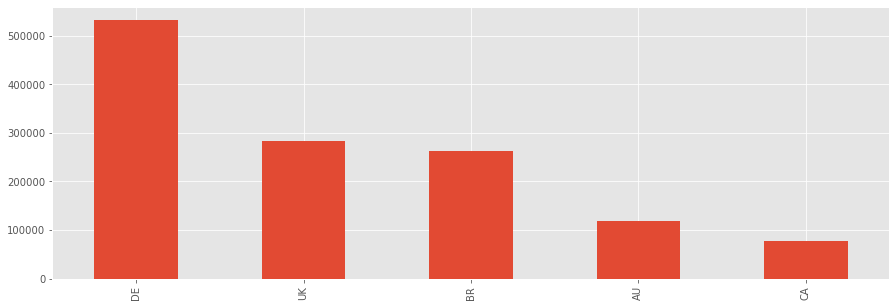

In [15]:
countries.plot(kind='bar')

In [16]:
devices = df['pub_device'].value_counts()
devices

desktop    594729
phone      541075
tablet     139381
Name: pub_device, dtype: int64

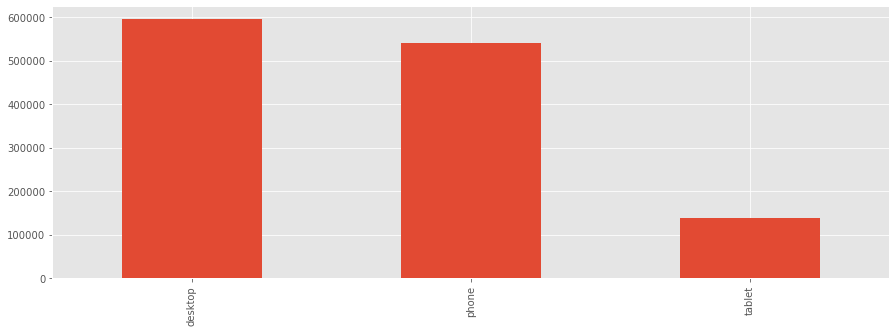

In [17]:
devices.plot(kind='bar')

In [18]:
df['theme_name_english'].value_counts()

ItemHotel                 205552
Hotel                     181983
CityOnly                   93916
Accommodation              54775
Holidayflat                47469
                           ...  
RegionHotelsLastMinute         6
HTHotelsGoodValue              3
HTHotelsBudget                 1
HTHotelsPeriodDec              1
CountryHotelsOffer             1
Name: theme_name_english, Length: 408, dtype: int64

In [19]:
# item = hotel

In [20]:
types = df['replacement_type_name'].value_counts()
types

City           768430
Item           205552
CityOnly        93916
Region          91949
Poi             46969
Country         30862
RegionOnly      12047
HT              10688
PoiOnly          7663
CountryOnly      7109
Name: replacement_type_name, dtype: int64

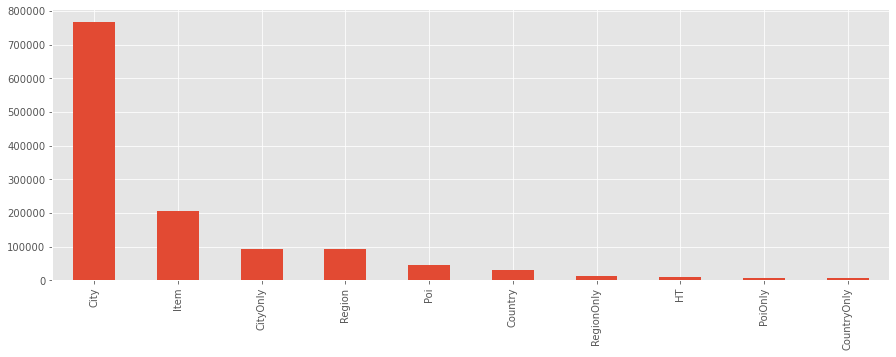

In [21]:
types.plot(kind='bar')

In [22]:
df['ymd'] # graph of days of the week

0          20200905
1          20200905
2          20200905
3          20200905
4          20200905
             ...   
1275180    20210303
1275181    20210303
1275182    20210303
1275183    20210303
1275184    20210303
Name: ymd, Length: 1275185, dtype: int64

### Counting number of bookings by day of the week

In [23]:
df_with_weekdays = df[['ymd','bookings']].copy()

In [24]:
df_with_weekdays

,ymd,bookings
0,20200905,0.0
1,20200905,0.0
2,20200905,0.0
3,20200905,0.0
4,20200905,0.0
...,...,...
1275180,20210303,0.0
1275181,20210303,0.0
1275182,20210303,0.0
1275183,20210303,NaN


#### Convert 'ymd' column to type datetime using pd.to_datetime()

In [25]:
pd.to_datetime('20200905', format='%Y%m%d')

Timestamp('2020-09-05 00:00:00')

In [26]:
pd.to_datetime(df_with_weekdays['ymd'], format='%Y%m%d')

0         2020-09-05
1         2020-09-05
2         2020-09-05
3         2020-09-05
4         2020-09-05
             ...    
1275180   2021-03-03
1275181   2021-03-03
1275182   2021-03-03
1275183   2021-03-03
1275184   2021-03-03
Name: ymd, Length: 1275185, dtype: datetime64[ns]

#### get day of the week from 'ymd' column using pd.dt.dayofweek

In [27]:
# 0 is monday, 1 is tuesday, etc.
weekdays = pd.to_datetime(df_with_weekdays['ymd'], format='%Y%m%d').dt.dayofweek
weekdays

0          5
1          5
2          5
3          5
4          5
          ..
1275180    2
1275181    2
1275182    2
1275183    2
1275184    2
Name: ymd, Length: 1275185, dtype: int64

In [28]:
df_with_weekdays.loc[:,'weekday'] = weekdays

In [29]:
at_least_one_booking = df_with_weekdays[df_with_weekdays['bookings'] > 0]
no_bookings = df_with_weekdays[df_with_weekdays['bookings'] == 0]


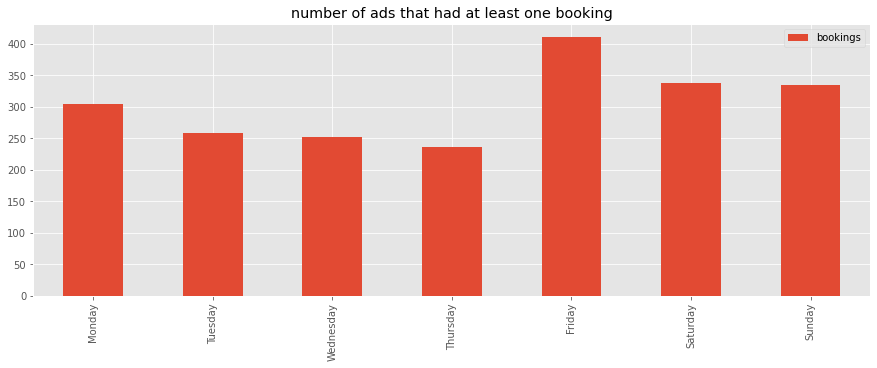

In [30]:
weekday_counts_at_least_one = at_least_one_booking.groupby('weekday').aggregate(len)
del weekday_counts_at_least_one['ymd']
weekday_counts_at_least_one.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts_at_least_one.plot(kind='bar', title='number of ads that had at least one booking')

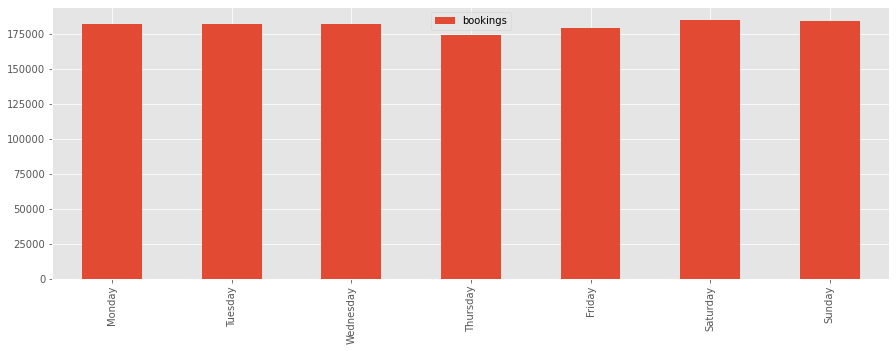

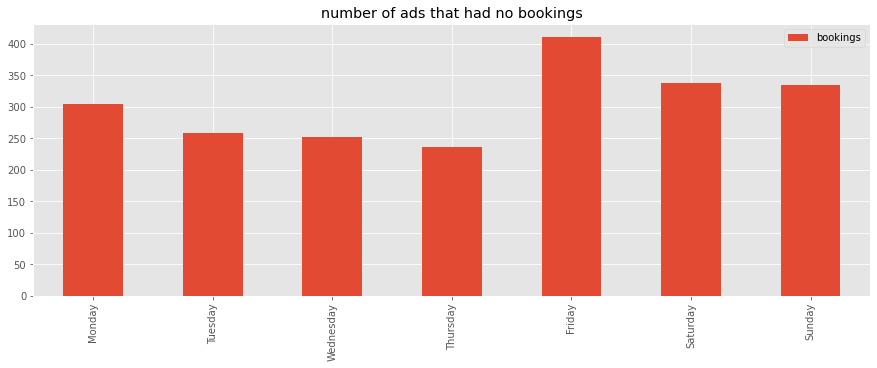

In [31]:
weekday_counts_zero = no_bookings.groupby('weekday').aggregate(len)
del weekday_counts_zero['ymd']
weekday_counts_zero.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts_zero.plot(kind='bar')
weekday_counts_at_least_one.plot(kind='bar', title='number of ads that had no bookings')

### Hypothesis testing to see if Friday has on average more bookings than Thursday